<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании


«Мегалайн» — компания федерального оператора сотовой связи. Клиентам компании предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предлагается сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.    
    
*Описание тарифов:*    
**Тариф «Смарт»**    
- Ежемесячная плата: 550 рублей    
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика    
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.    
    
**Тариф «Ультра»**    
- Ежемесячная плата: 1950 рублей    
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.


## Изучение данных из файлов

In [16]:
#Загружаем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore') #отключим выпадающие сообщения о циклических присваиваниях

#Загружаем данные
try:
    # Локальный путь
    data_calls = pd.read_csv('C:/Users/datasets/calls.csv')
    data_internet = pd.read_csv('C:/Users/datasets/internet.csv')
    data_messages = pd.read_csv('C:/Users/datasets/messages.csv')
    data_tariffs = pd.read_csv('C:/Users/datasets/tariffs.csv')
    data_users = pd.read_csv('C:/Users/datasets/users.csv')
except:
    # Серверный путь
    data_calls = pd.read_csv('/datasets/calls.csv')
    data_internet = pd.read_csv('/datasets/internet.csv')
    data_messages = pd.read_csv('/datasets/messages.csv')
    data_tariffs = pd.read_csv('/datasets/tariffs.csv')
    data_users = pd.read_csv('/datasets/users.csv')

#Изучим общую информацию
data = [data_calls, data_internet, data_messages, data_users]
for i in data:
    display(i.sample(5))
    #display(i.describe())
    print()
    i.info()

display(data_tariffs) 

,id,call_date,duration,user_id
190049,1468_20,2018-07-17,0.00,1468
169794,1418_11,2018-12-03,0.00,1418
155148,1383_61,2018-12-25,5.69,1383
76093,1189_761,2018-12-28,0.00,1189
54279,1135_572,2018-06-07,4.24,1135



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
135077,135077,1453_298,525.90,2018-10-06,1453
32945,32945,1115_148,577.21,2018-09-27,1115
140710,140710,1472_384,165.89,2018-11-21,1472
96854,96854,1326_217,199.53,2018-10-22,1326
31152,31152,1109_218,123.95,2018-08-05,1109



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,id,message_date,user_id
89792,1374_240,2018-08-28,1374
13446,1056_28,2018-04-27,1056
56365,1250_189,2018-08-08,1250
88552,1369_477,2018-09-02,1369
8254,1033_5,2018-11-22,1033



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
109,1109,64,NaN,Санкт-Петербург,Екатерина,Андрющенко,2018-02-23,smart
278,1278,46,NaN,Новокузнецк,Леонид,Троицкий,2018-12-23,smart
248,1248,51,NaN,Москва,Анатолий,Минаев,2018-05-28,smart
104,1104,60,NaN,Нижний Тагил,Габриэль,Поляков,2018-02-21,ultra
39,1039,40,NaN,Ярославль,Агнесса,Андреенко,2018-06-21,ultra



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод

Имеем пять исходных датафреймов. Данные о звонках, интернет-трафике, сообщениях, сведения о клиентах и тарифах. Исходные датафреймы имеют разное количество строк и столбцов. Данные в столбцах имеют различные типы: целые и вещественные числа, строчные объекты. Названия столбцов отображены корректно, кроме data_internet['Unnamed: 0']. Столбец data_internet['Unnamed: 0'] отсутствует в описании и его значения пвторяют индексы, скорее всего это техническая ошибка. Только в 1 столбце 'churn_date' имеются пропуски и то по понятной причине. Столбцы с датами необходимо перевести в соответствующий тип. Наличие дубликатов сразу не видно, но обязательно проверим их наличие или отсутствие в столбце с названием городов. Данные требуют минимальной обработки, что не может не радовать. Думаю стоит отметить хорошую работу технической команды, которая готовила исходные данные.    
Учитывая специфику данных, метод describe() на данном этапе использовать нет смысла, разве что можно посмотреть реалистичность некоторых данных - например, возраст клиентов (от 18 до 75 лет) и продолжительность разговора (от 0 до 38 минут). Чтобы не перегружать выводимую информацию, метод закоментил.

## Предобработка данных

In [17]:
#убираем пропуски
print(data_users.isna().sum()) # посмотрим на пропуски в столбцах
print()
#взглянем на данные в столбце 'churn_date'
print(data_users['churn_date'].sort_values(ascending=False).unique()) 
print()
#пропуски меняем на 2018-12-31
data_users['churn_date'] = data_users['churn_date'].fillna('2018-12-31') 

#проверка результата
print('Пропусков нет!')
print(data_users.isna().sum()) # проверим результат, от пропусков избавились! 
print()

#удалим столбец 'Unnamed: 0'
data_internet = data_internet.drop('Unnamed: 0', 1)
display(data_internet.sample(5))
print()

#проверим на явные дубликаты
print('Количество найденых явных дубликатов', data_users.duplicated().sum()) #дубликотов нет
print()

#проверим есть ли не явные дубликаты
print(data_users['tariff'].sort_values().unique()) #все в порядке
print()
print(data_users['city'].sort_values().unique()) #все в порядке
print()

#поменяем в соответствующих столбцах типы данных на datetime
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%dT%H:%M:%S')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%dT%H:%M:%S')
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%dT%H:%M:%S')

#for i in [data_users['churn_date'], data_users['reg_date'], data_calls['call_date'], data_internet['session_date'], data_messages['message_date']]:
#    i = pd.to_datetime(i, format='%Y-%m-%dT%H:%M:%S')
# цикл не заработал, пришел к выводу, что он наверно создает новые объекты

data_users.info() #больше ничего менять пока не требуется

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

['2018-12-30' '2018-12-26' '2018-12-25' '2018-12-24' '2018-12-23'
 '2018-12-21' '2018-12-20' '2018-12-18' '2018-12-16' '2018-12-14'
 '2018-12-11' '2018-12-09' '2018-12-03' '2018-11-30' '2018-11-27'
 '2018-11-26' '2018-11-22' '2018-11-21' '2018-11-16' '2018-11-13'
 '2018-11-07' '2018-10-28' '2018-10-27' '2018-10-25' '2018-10-14'
 '2018-10-05' '2018-10-04' '2018-10-03' '2018-09-27' '2018-09-26'
 '2018-09-02' '2018-08-31' '2018-08-17' nan]

Пропусков нет!
user_id       0
age           0
churn_date    0
city          0
first_name    0
last_name     0
reg_date      0
tariff        0
dtype: int64



,id,mb_used,session_date,user_id
100851,1338_241,575.07,2018-06-10,1338
105646,1357_73,0.00,2018-11-30,1357
116951,1393_437,174.05,2018-02-17,1393
41054,1144_214,124.04,2018-09-19,1144
107479,1365_3,207.15,2018-12-28,1365



Количество найденых явных дубликатов 0

['smart' 'ultra']

['Архангельск' 'Астрахань' 'Балашиха' 'Барнаул' 'Белгород' 'Брянск'
 'Владивосток' 'Владикавказ' 'Владимир' 'Волгоград' 'Волжский' 'Вологда'
 'Воронеж' 'Грозный' 'Екатеринбург' 'Иваново' 'Ижевск' 'Иркутск' 'Казань'
 'Калининград' 'Калуга' 'Кемерово' 'Киров' 'Кострома' 'Краснодар'
 'Красноярск' 'Курган' 'Курск' 'Липецк' 'Магнитогорск' 'Махачкала'
 'Москва' 'Мурманск' 'Набережные Челны' 'Нижневартовск' 'Нижний Новгород'
 'Нижний Тагил' 'Новокузнецк' 'Новороссийск' 'Новосибирск' 'Омск'
 'Оренбург' 'Орёл' 'Пенза' 'Пермь' 'Петрозаводск' 'Подольск'
 'Ростов-на-Дону' 'Рязань' 'Самара' 'Санкт-Петербург' 'Саранск' 'Саратов'
 'Севастополь' 'Смоленск' 'Сочи' 'Ставрополь' 'Стерлитамак' 'Сургут'
 'Тамбов' 'Тверь' 'Тольятти' 'Томск' 'Тула' 'Тюмень' 'Улан-Удэ'
 'Ульяновск' 'Уфа' 'Хабаровск' 'Химки' 'Чебоксары' 'Челябинск' 'Череповец'
 'Чита' 'Якутск' 'Ярославль']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data c

### Вывод

*Пропуски*    
Пропуски у нас мы обнаружили только в столбце 'churn_date' где находится дата прекращения пользования тарифом. Если значение там пропущено, то тариф ещё действовал на момент выгрузки данных. Поэтому заполняем пропуски последней датой исследуемого периода, а именно 31 декабря 2018 года.    
    
*Ошибки*    
Столбец data_internet['Unnamed: 0'] отсутствует в описании и его значения повторяют индексы, скорее всего это техническая ошибка, удалим его.   
    
*Дубликаты*     
Проверим в наших датасетах столбцы data_users['city'] и data_users['tariff'] с нечисловыми значениями, содержащие название населенных пунктов и название тарифа соответственно, на наличие дубликатов. Метод duplicated() показывает, что явных дубликатов у нас нет. Выведя соответствующие уникальные значения видим отсутствие неявных дубликатов. 
    
    
*Типы данных*    
Тип данных в столбцах data_users['churn_date'], data_users['reg_date'], data_calls['call_date'], data_internet['session_date'], data_messages['message_date'] поменяем на тип datetime, т.к. в наших расчетах потребуются эти данные. Остальное оставим без изменений.

## Исследовательский анализ данных

In [18]:
#посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя 
data_calls = data_calls.merge(data_users, on='user_id', how='outer') #соединим датасеты со звонками и со сведениями о клиентах
data_calls['month'] = data_calls['call_date'].dt.month #добавим столбец с месяцем
data_calls['duration'] = data_calls['duration'].apply(np.ceil) #округлим минуты до целых согласно билинга "Мегалайна"
#сгруппируем по пользователю и месяцу
data_calls_pivot = data_calls.pivot_table(index=['user_id', 'month','tariff', 'city'], values='duration', aggfunc=['count', 'sum'])
data_calls_pivot.columns = ['calls_count', 'calls_sum'] #переименнуем столбцы

#посчитаем количество отправленных сообщений по месяцам для каждого пользователя
data_messages = data_messages.merge(data_users, on='user_id', how='outer') #объединим сообщения и сведения о клиентах
data_messages['month'] = data_messages['message_date'].dt.month #добавим столбец с месяцем
#сгруппируем по пользователю и месяцу
data_messages = data_messages.pivot_table(index=['user_id', 'month','tariff', 'city'], values='id', aggfunc=['count']) 
data_messages.columns = ['messages_count'] #переименнуем столбцы
#объединим в одну таблицу
data = data_calls_pivot.merge(data_messages, on=['user_id', 'month', 'tariff', 'city'], how='outer').reset_index() 

#посчитаем количество израсходованного интернет трафика по месяцам для каждого пользователя 
data_internet = data_internet.merge(data_users, on='user_id', how='outer') #объединим интернет-трафик и сведения о клиентах
data_internet['month'] = data_internet['session_date'].dt.month #добавим столбец с месяцем
#сгруппируем по пользователю и месяцу
data_internet_pivot = data_internet.pivot_table(index=['user_id', 'month','tariff', 'city'], values='mb_used', aggfunc=['count', 'sum'])
data_internet_pivot.columns = ['internet_count', 'internet_sum'] #переименнуем столбцы
data_internet_pivot['internet_sum'] = data_internet_pivot['internet_sum']/1024 #переведем в Гб 
#округлим до Гб согласно билинга "Мегалайна"
data_internet_pivot['internet_sum'] = data_internet_pivot['internet_sum'].apply(np.ceil) 
data = data.merge(data_internet_pivot, on=['user_id', 'month', 'tariff', 'city'], how='outer') #объединим в одну таблицу

#посчитаем помесячную выручку с каждого пользователя
data = data.fillna(0) #заменим пропуски нулями
for index in range(len(data['tariff'])):
    if data.loc[index, 'tariff'] == 'smart':
        x = data.loc[index, 'calls_sum'] - 500
        if x < 0:
            x = 0
        y = data.loc[index, 'messages_count'] - 50
        if y < 0:
            y = 0
        z = data.loc[index, 'internet_sum'] - 15
        if z < 0:
            z = 0
        data.loc[index, 'revenue'] = x*3 + y*3 + z*200 + 550
    else:
        x = data.loc[index, 'calls_sum'] - 3000
        if x < 0:
            x = 0
        y = data.loc[index, 'messages_count'] - 1000
        if y < 0:
            y = 0
        z = data.loc[index, 'internet_sum'] - 30
        if z < 0:
            z = 0
        data.loc[index, 'revenue'] = x + y + z*150 + 1950
display('Случайная выборка помесячной выручки с каждого пользователя', data.sample(10))
print()

#срез по тарифу смарт по месяцам
data_smart = (data.query(('tariff == "smart"'))
                  .pivot_table(index=['month'], 
                             values=['calls_count', 'calls_sum', 'messages_count', 'internet_count', 'internet_sum', 'revenue'],
                             aggfunc=['sum'], margins=True).reset_index()
)
#переименнуем столбцы
data_smart.columns = ['month', 'calls_count', 'calls_sum', 'mess_count', 'inter_count', 'inter_sum', 'revenue']
#добавим столбец со средним значением продолжительности звонков
data_smart.insert(2, 'calls_mean', 0)
data_smart['calls_mean'] = data_smart['calls_sum']/data_smart['calls_count']
#добавим столбец со средним значением продолжительности сессии
data_smart.insert(6, 'inter_mean', 0)
data_smart['inter_mean'] = data_smart['inter_sum']/data_smart['inter_count'] 
#добавим столбец с количеством пользователей
for index in range(12):
    data_smart.loc[index, 'us_count'] = data.query(('month == index+1') and ('tariff == "smart"'))['user_id'].nunique()
data_smart.loc[12, 'us_count'] = data_smart.loc[:11, 'us_count'].sum()
#добавим столбец со средним значением выручки на одного пользователя
data_smart['rev_mean'] = data_smart['revenue']/data_smart['us_count']
data_smart['rev_mean'] = data_smart['rev_mean'].apply(np.ceil) #округлим до рублей
#добавим столбец со средним значением количества звонков для одного пользователя за месяц
data_smart.insert(3, 'calls_us_mean', 0)
data_smart['calls_us_mean'] = data_smart['calls_count']/data_smart['us_count']
display('Тариф Смарт', data_smart)
print()

#срез по тарифу ультра по месяцам 
data_ultra = (data.query(('tariff == "ultra"'))
                  .pivot_table(index=['month'], 
                            values=['calls_count', 'calls_sum', 'messages_count', 'internet_count', 'internet_sum', 'revenue'],
                            aggfunc=['sum'], margins=True).reset_index()
)                    
#переименнуем столбцы
data_ultra.columns = ['month', 'calls_count', 'calls_sum', 'mess_count', 'inter_count', 'inter_sum', 'revenue'] 
#добавим столбец со средним значением продолжительности звонков
data_ultra.insert(2, 'calls_mean', 0)
data_ultra['calls_mean'] = data_ultra['calls_sum']/data_ultra['calls_count'] 
#добавим столбец со средним значением продолжительности сессии
data_ultra.insert(6, 'inter_mean', 0)
data_ultra['inter_mean'] = data_ultra['inter_sum']/data_ultra['inter_count'] 
#добавим столбец с количеством пользователей
for index in range(12):
    data_ultra.loc[index, 'us_count'] = data.query(('month == index+1') and ('tariff == "ultra"'))['user_id'].nunique()
data_ultra.loc[12, 'us_count'] = data_ultra.loc[:11, 'us_count'].sum()
#добавим столбец со средним значением выручки на одного пользователя
data_ultra['rev_mean'] = data_ultra['revenue']/data_ultra['us_count']
data_ultra['rev_mean'] = data_ultra['rev_mean'].apply(np.ceil) #округлим до рублей
#добавим столбец со средним значением количества звонков для одного пользователя за месяц
data_ultra.insert(3, 'calls_us_mean', 0)
data_ultra['calls_us_mean'] = data_ultra['calls_count']/data_ultra['us_count']
display('Тариф Ультра', data_ultra)
print()



'Случайная выборка помесячной выручки с каждого пользователя'

,user_id,month,tariff,city,calls_count,calls_sum,messages_count,internet_count,internet_sum,revenue
2912,1458,4.0,ultra,Барнаул,108.0,761.0,4.0,28.0,15.0,1950.0
1097,1175,7.0,smart,Москва,50.0,366.0,0.0,47.0,14.0,550.0
641,1102,7.0,smart,Москва,70.0,538.0,40.0,76.0,21.0,1864.0
101,1014,6.0,smart,Чебоксары,31.0,180.0,48.0,76.0,25.0,2550.0
2300,1370,5.0,smart,Новороссийск,25.0,208.0,0.0,48.0,14.0,550.0
2777,1435,4.0,smart,Москва,43.0,309.0,0.0,58.0,18.0,1150.0
1026,1165,10.0,ultra,Самара,16.0,138.0,107.0,41.0,22.0,1950.0
1109,1176,7.0,smart,Волгоград,39.0,353.0,64.0,60.0,16.0,792.0
2980,1468,9.0,smart,Тамбов,30.0,177.0,13.0,33.0,13.0,550.0
1406,1224,6.0,smart,Магнитогорск,87.0,559.0,0.0,68.0,22.0,2127.0


'Тариф Смарт'

,month,calls_count,calls_mean,calls_us_mean,calls_sum,mess_count,inter_count,inter_mean,inter_sum,revenue,us_count,rev_mean
0,1,941.0,7.365569,2.688571,6931.0,871.0,297.0,2.087542,620.0,24525.0,350.0,71.0
1,2,2331.0,7.432003,6.660000,17324.0,2057.0,687.0,2.033479,1397.0,48001.0,350.0,138.0
2,3,4183.0,7.180014,11.951429,30034.0,3612.0,1173.0,2.091219,2453.0,89676.0,350.0,257.0
3,4,5747.0,7.154863,16.420000,41119.0,4682.0,1526.0,2.256225,3443.0,107866.0,350.0,309.0
4,5,7789.0,7.012197,22.254286,54618.0,6816.0,2243.0,2.123049,4762.0,168849.0,350.0,483.0
5,6,9110.0,7.122393,26.028571,64885.0,7941.0,2616.0,2.094037,5478.0,197459.0,350.0,565.0
6,7,11402.0,7.198649,32.577143,82079.0,9865.0,3191.0,2.125979,6784.0,246014.0,350.0,703.0
7,8,13860.0,7.146104,39.600000,99045.0,11995.0,3933.0,2.009916,7905.0,310340.0,350.0,887.0
8,9,15482.0,7.197972,44.234286,111439.0,13126.0,4262.0,2.052088,8746.0,324986.0,350.0,929.0
9,10,17629.0,7.106699,50.368571,125284.0,15183.0,4963.0,2.000201,9927.0,401267.0,350.0,1147.0


'Тариф Ультра'

,month,calls_count,calls_mean,calls_us_mean,calls_sum,mess_count,inter_count,inter_mean,inter_sum,revenue,us_count,rev_mean
0,1,535.0,7.201869,3.614865,3853.0,246.0,119.0,2.554622,304.0,17550.0,148.0,119.0
1,2,997.0,7.152457,6.736486,7131.0,584.0,288.0,1.829861,527.0,47400.0,148.0,321.0
2,3,2504.0,7.235224,16.918919,18117.0,1273.0,653.0,1.830015,1195.0,74550.0,148.0,504.0
3,4,3525.0,7.146383,23.817568,25191.0,1829.0,933.0,1.860665,1736.0,110100.0,148.0,744.0
4,5,4858.0,7.038287,32.824324,34192.0,2592.0,1298.0,1.953775,2536.0,138000.0,148.0,933.0
5,6,5606.0,7.187834,37.878378,40295.0,3116.0,1591.0,2.203017,3505.0,171300.0,148.0,1158.0
6,7,6896.0,7.202291,46.594595,49667.0,3683.0,1866.0,2.430868,4536.0,192750.0,148.0,1303.0
7,8,7628.0,7.164788,51.540541,54653.0,4097.0,2097.0,2.471626,5183.0,222900.0,148.0,1507.0
8,9,8579.0,7.231146,57.966216,62036.0,4386.0,2213.0,2.717126,6013.0,232800.0,148.0,1573.0
9,10,9517.0,7.212777,64.304054,68644.0,4826.0,2468.0,2.912075,7187.0,254100.0,148.0,1717.0


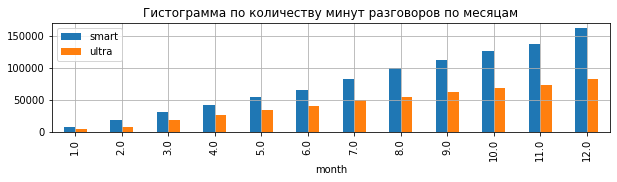

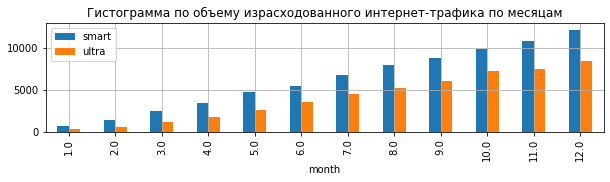

In [19]:
#построим гистограммы по количеству минут разговоров по месяцам для обоих тарифов
data_smart_gis = data_smart.loc[:11, ['month', 'calls_sum']]#сделаем срез по 2 столбцам
data_smart_gis.columns = ['month', 'smart'] #переименнуем столбцы
data_ultra_gis = data_ultra.loc[:11, ['month', 'calls_sum']]#сделаем срез по 2 столбцам
data_ultra_gis.columns = ['month', 'ultra'] #переименнуем столбцы
data_smart_gis.merge(data_ultra_gis, on='month').plot.bar(x='month', xlim=(0, 13), ylim=(0, 170000), figsize=(10, 2), grid=True)
plt.title('Гистограмма по количеству минут разговоров по месяцам')
plt.show()

#построим гистограммы по объему израсходованного интернет-трафика по месяцам по месяцам для обоих тарифов
data_smart_gis = data_smart.loc[:11, ['month', 'inter_sum']]#сделаем срез по 2 столбцам
data_smart_gis.columns = ['month', 'smart'] #переименнуем столбцы
data_ultra_gis = data_ultra.loc[:11, ['month', 'inter_sum']]#сделаем срез по 2 столбцам
data_ultra_gis.columns = ['month', 'ultra'] #переименнуем столбцы
data_smart_gis.merge(data_ultra_gis, on='month').plot.bar(x='month', xlim=(0, 13), ylim=(0, 13000), figsize=(10, 2), grid=True)
plt.title('Гистограмма по объему израсходованного интернет-трафика по месяцам')
plt.show()


Звонки Дисперсия равна 35.51173924372318 Стандартное отклонение равно 5.959172697927388


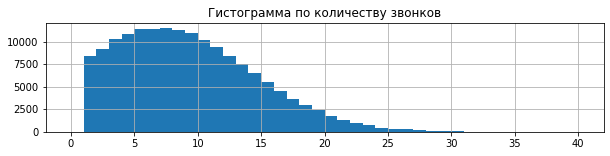


Интернет трафик Дисперсия равна 0.07386342944616384 Стандартное отклонение равно 0.271778272579255


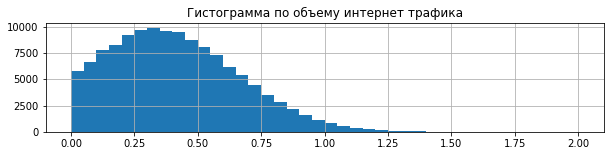

In [20]:
#посчитаем дисперсию, стандартное отклонение, построим гистограммы (поскольку это выборка , то ddof=1)
print('Звонки', 'Дисперсия равна', np.var(data_calls['duration'], ddof=1), 
      'Стандартное отклонение равно', np.std(data_calls['duration'], ddof=1)) 
data_calls = data_calls.query(('duration != 0')) #для наглядности уберем нулевые значения
data_calls['duration'].hist(bins=40, range=(0, 40), figsize=(10, 2)) #построим гистограмму
plt.title('Гистограмма по количеству звонков')
plt.show()
print()
data_internet['mb_used'] = data_internet['mb_used']/1024 #переведем в Гб 
print('Интернет трафик', 'Дисперсия равна', np.var(data_internet['mb_used'], ddof=1), 
      'Стандартное отклонение равно', np.std(data_internet['mb_used'], ddof=1)) 
#display(data_internet_all)
data_internet = data_internet.query(('mb_used != 0')) #для наглядности уберем нулевые значения
data_internet['mb_used'].hist(bins=40, range=(0, 2), figsize=(10, 2)) #построим гистограмму
plt.title('Гистограмма по объему интернет трафика')
plt.show()
print()


### Вывод

Для удобства исследовательского анализа данных объединили каждую из таблиц со звонками, сообщениями и интернет-трафиком с таблицей со сведениями о пользователях. В каждой из полученных таблиц сгруппировали данные по пользователю, месяцу и тарифу. Затем все объединили в общий датафрейм. Далее посчитали для каждого пользователя и добавили соответствующий столбец в полученный датафрейм следующие значения:    
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку.    
    
Затем сделали срезы по тарифам и получили две новые таблицы с данными в соответствии с используемым тарифом. В полученных таблицах добавили нужные нам стобцы с рассчитанными значениями:    
- со средним значением продолжительности звонков;
- со средним значением количества звонков для одного пользователя за месяц;
- со средним значением продолжительности сессии;
- с количеством пользователей;
- со средним значением выручки на одного пользователя.    
    
Для визуализации полученных результатов построили гистограммы по количеству минут разговоров и гистограммы по объему израсходованного интернет-трафика по месяцам для обоих тарифов. Далее построили гистограммы по количеству звонков и по объему интернет трафика. Рассчитали дисперсии и стандартные отклонения.    
    
В результате указанных расчетов получили, что в целом потребности пользователей в предоставляемых услугах в 2018 году только росли. Причем наблюдался динамичный рост в течении года по всем услугам - и по количеству звонков и смс-сообщений и по объему используемого интернет-трафика. Причем такая тенденция справедлива для обоих тарифов. Это хорошо видно, например, по среднему количеству звонков сделанным одним пользователем в месяц. Если в январе оно составляло на тарифе *смарт* примерно 2,6, то в следующем месяце это уже 6,7, а к концу года в среднем пользователь делал уже 64 звонка. Рост потребностей носил относительно линейный характер, что видно на соответствующих гистограммах. Но при этом стоит отметить, среднее время разговора оставалось примерно одинаковым, около 7 минут и это говорит о том что продолжительность звонков не менялась. Такая же картина складывалась и для использования интернет-трафика. С ростом потребностей в услугах также росла, как сама выручка с предоставляемых услуг, так и ее среднее значение. И это также справедливо для обоих тарифов.    
По гистограммам по количеству звонков и по объему интернет трафика видим что они похожи, распределения в обоих случаях носят нормальный характер, это говорит о скорее всего реалистичности наших данных. Видим, что расчитанное среднее совпадает с пиком на гистограмме, около семи минут. Видим также, что правило трех сигм тоже скорее всего выполняется, расчитанное отклонение умноженное на 3 и прибавленне среднее 7 - это будет около 25, что как мы видим на гистограмме большинство значений и находится ниже этой границы. Для данных по интернет-трафику среднее для каждого пользователя не рассчитывали из-за и без того больших объемов рассчытываемых данных и для того, чтобы не перегружать визуализацию. Но там картина складывается в целом такая же.


## Проверка гипотез

In [21]:
#проверим первое утверждение
#срез по пользователям по тарифу смарт  
data_smart_all = data.query(('tariff == "smart"'))
#data_smart_all.info()
#срез по пользователям по тарифу ультра
data_ultra_all = data.query(('tariff == "ultra"'))
#data_ultra_all.info()

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(data_smart_all['revenue'], data_ultra_all['revenue'], equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


In [22]:
#проверим второе утверждение
#срез по пользователям из Москвы  
data_moscow = data.query(('city == "Москва"'))
#data_moscow.info()
#срез по пользователям из других городов
data_another = data.query(('city != "Москва"'))
#data_another.info()

alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(data_moscow['revenue'], data_another['revenue'], equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


### Вывод

По условию проекта имеем две гипотезы о равенстве средних двух генеральных совокупностей. Воспользуемся специальным методом для проверки гипотез о равенстве среднего по взятым из них выборкам st.ttest_ind(). Имеем достаточно большие, но не равные по размеру выборки в обоих случаях. Количество жителей Москвы и других городов не равно и количество пользователей тарифами тоже разное. Это видно из срезов методом info() (закомметил, чтобы не перегружать визуализацию). Сравним средние t-тестом, указав параметр equal_var = False, чтобы тест посчитал дисперсии выборок по отдельности. Пороговое значение alpha зададим 0,01.    
    
**Первое утверждение - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.**    
*Нулевая гипотеза:*
- средняя выручка пользователей тарифов «Ультра» и «Смарт» равна    
    
*Альтернативная гипотеза:*
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различается    

В результате расчетов отвергаем нулевую гипотезу, это говорит о том, что с большой вероятностью средняя выручка у обоих тарифов возможно различается. Чтобы сделать вывод какой тариф лучше был на тот период попробуем понять из данных, полученных в исследовательском анализе.    
    
**Второе утверждение - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**    
*Нулевая гипотеза:*
- средняя выручка пользователей из Москвы равна выручке пользователей из других регионов    
    
*Альтернативная гипотеза:*
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов    
    
В результате расчетов отвергнуть нулевую гипотезу не получилось, это говорит о том, что действительно с большой вероятностью средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. 


## Общий вывод


**Цель** данного исследования, определить лучший тарифный план федерального оператора сотовой связи компании «Мегалайн».    
   
 
Клиентам компании предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.    
Предлагается сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. 
   

**Предобработка данных**    

В первой части анализа - *Предобработка данных*  столкнулись с минимум проблем. Предлагаю этот момент отметить руководству компании. Техническая команда осуществляющая выгрузку данных справилась с работой отлично. Но тем не менее было обнаружено следующее:    
- *В исходных данных пропуски мы обнаружили только в столбце 'churn_date' где находится дата прекращения пользования тарифом. Значение там было пропущено из-за того, что тариф ещё действовал на момент выгрузки данных. Нам пришлось заполнить его последней датой исследуемого периода.*
- *Столбец data_internet['Unnamed: 0'] отсутствует в описании и его значения повторяют индексы, скорее всего это техническая ошибка.*
- *Тип данных в столбцах с датами data_users['churn_date'], data_users['reg_date'], data_calls['call_date'], data_internet['session_date'], data_messages['message_date'] поменяли на соответствующий тип datetime.*   


**Исследовательский анализ данных**    

Для удобства исследовательского анализа данных объединили каждую из исходных таблиц в общую таблицу. Далее посчитали для каждого пользователя и добавили соответствующий столбец в полученный датафрейм следующие значения:    
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку.    
    
Затем сделали срезы по тарифам и получили две новые таблицы с данными в соответствии с используемым тарифом. В полученных таблицах добавили нужные нам стобцы с рассчитанными значениями:    
- со средним значением продолжительности звонков;
- со средним значением количества звонков для одного пользователя за месяц;
- со средним значением продолжительности сессии;
- с количеством пользователей;
- со средним значением выручки на одного пользователя.    
    
Для визуализации полученных результатов построили гистограммы по количеству минут разговоров и гистограммы по объему израсходованного интернет-трафика по месяцам для обоих тарифов. Далее построили гистограммы по количеству звонков и по объему интернет трафика. Рассчитали дисперсии и стандартные отклонения.    
    
В результате указанных расчетов получили, что в целом потребности пользователей в предоставляемых услугах в 2018 году только росли. Причем наблюдался динамичный рост в течении года по всем услугам - и по количеству звонков и смс-сообщений и по объему используемого интернет-трафика. Причем такая тенденция справедлива для обоих тарифов. Это хорошо видно, например, по среднему количеству звонков сделанным одним пользователем в месяц. Если в январе оно составляло на тарифе *смарт* примерно 2,6, то в следующем месяце это уже 6,7, а к концу года в среднем пользователь делал уже 64 звонка. Рост потребностей носил относительно линейный характер, что видно на соответствующих гистограммах. Но при этом стоит отметить, среднее время разговора оставалось примерно одинаковым, около 7 минут и это говорит о том что продолжительность звонков не менялась. Такая же картина складывалась и для использования интернет-трафика. С ростом потребностей в услугах также росла, как сама выручка с предоставляемых услуг, так и ее среднее значение. И это также справедливо для обоих тарифов.    
По гистограммам по количеству звонков и по объему интернет трафика видим что они похожи, распределения в обоих случаях носят нормальный характер, это говорит о скорее всего реалистичности наших данных. Видим, что расчитанное среднее совпадает с пиком на гистограмме, около семи минут. Для данных по сообщениям и по интернет-трафику картина складывается в целом такая же.

    
**Проверка гипотез**

В процессе исследования изучили две гипотезы о равенстве средних двух генеральных совокупностей по взятым из них выборкам. Выборки были достаточно большие, но не равные по размеру в обоих случаях. Количество жителей Москвы и других городов не равно и количество пользователей тарифами тоже разное. Сравнивали средние t-тестом, указав пороговым значением alpha 0,01.    
  
В первом случае, в результате расчетов отвергли гипотезу, что *средняя выручка пользователей тарифов «Ультра» и «Смарт» равна*. Это говорит о том, что с большой вероятностью средняя выручка у обоих тарифов возможно различается.     
    
Во втором случае, отвергнуть гипотезу, что *средняя выручка пользователей из Москвы равна выручке пользователей из других регионов* не получилось, это говорит о том, что действительно с большой вероятностью средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. 
    
**Подведя итог всему вышесказанному делаем вывод, что с одной стороны, с большой вероятностью средняя выручка у обоих тарифов возможно различается (хотя наверняка конечно это утверждать нельзя). С другой стороны, разными тарифами пользовалось разное количество клиентов. Количество пользователей тарифа "Смарт" в 2,4 раза больше, чем тарифа "Ультра". Но суммарную выручку за год тариф "Смарт" принес больше чем "Ультра" всего лишь в 1,4 раза. Исходя из этих соображений, тариф "Ультра" более прибыльный и возможно, дополнительная рекламная компания увеличила бы количество его пользователей. Но как правило, клиенты не хотят платить сразу много. Они предпочитают доплачивать за услуги сверх установленных лимитов, что тоже отлично. Также отметим, что потребности пользователей обоих тарифов в течении года одинаково динамично росли и в итоге принесли хорошую выручку компании.  Считаю, что оба тарифа показали себя хорошо и не надо давать предпочтение какому то одному из них. Наоборот они себя дополняют и охватывают более широкую часть потребительского рынка.**
 